# **Q3. Business Case: Yulu - Hypothesis Testing**

## **Problem Statement:**
### Analyze the data to identify
### 1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
### 2. How well those variables describe the electric cycle demands

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import missingno as msno
import  pingouin as pg
sns.set_theme(style="darkgrid")

***
***
## **1. Analyzing Basic Metrics.**

In [2]:
df = pd.read_csv('bike_sharing.txt')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print("Shape:", df.shape, "\n")

Shape: (10886, 12) 



In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

***
***
## **2. Missing Values.**

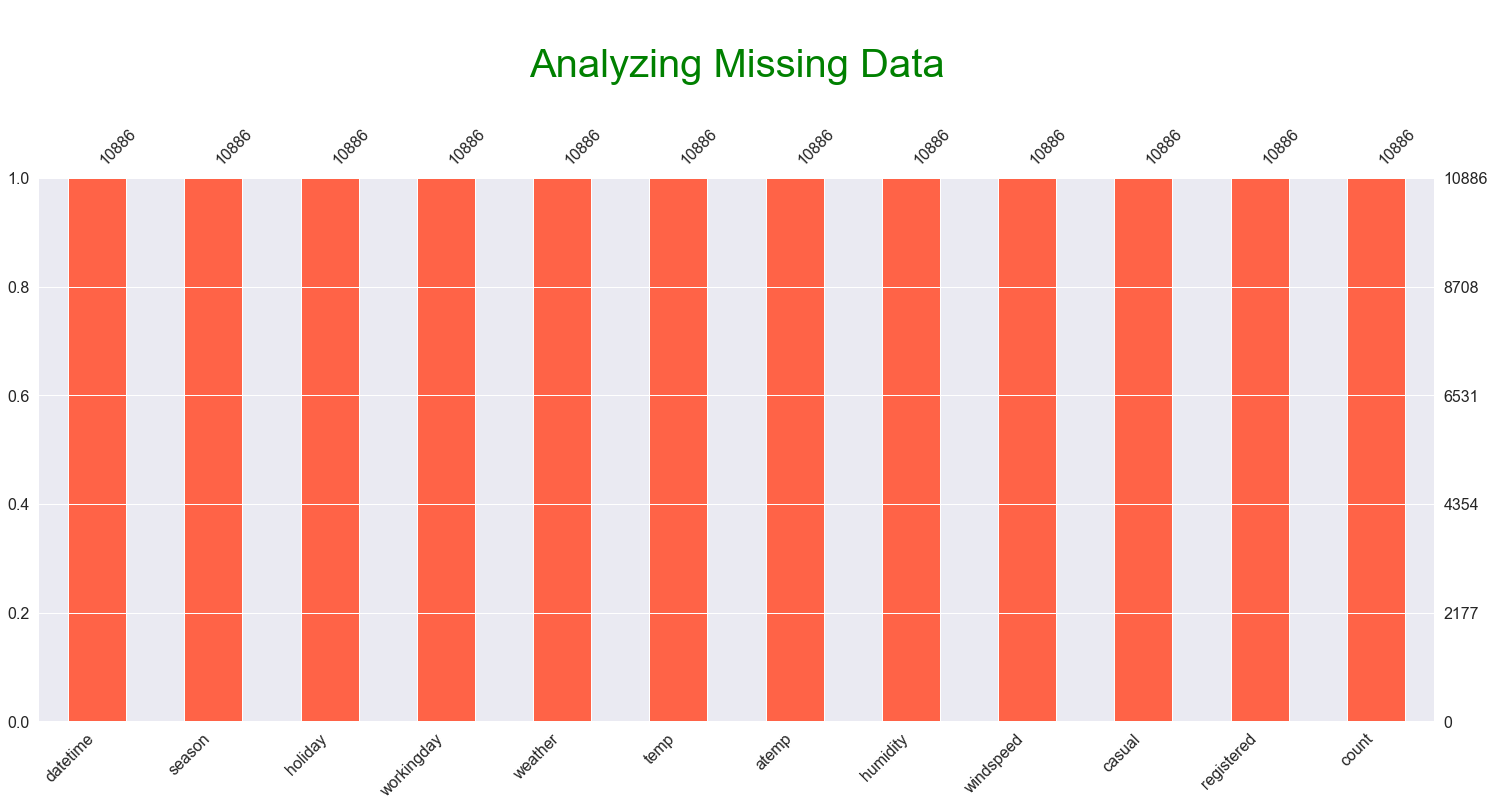

In [7]:
msno.bar(df, color='tomato')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


***
***
## **3. Univariate analysis - Categorical data.**

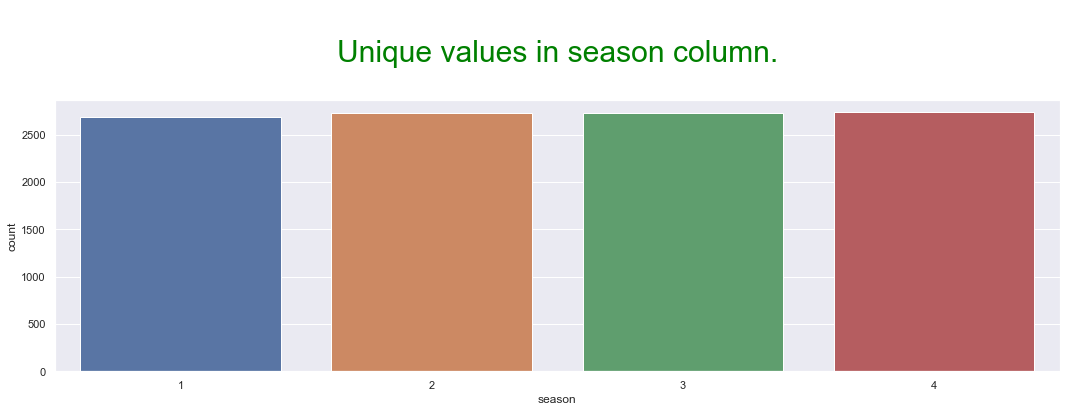

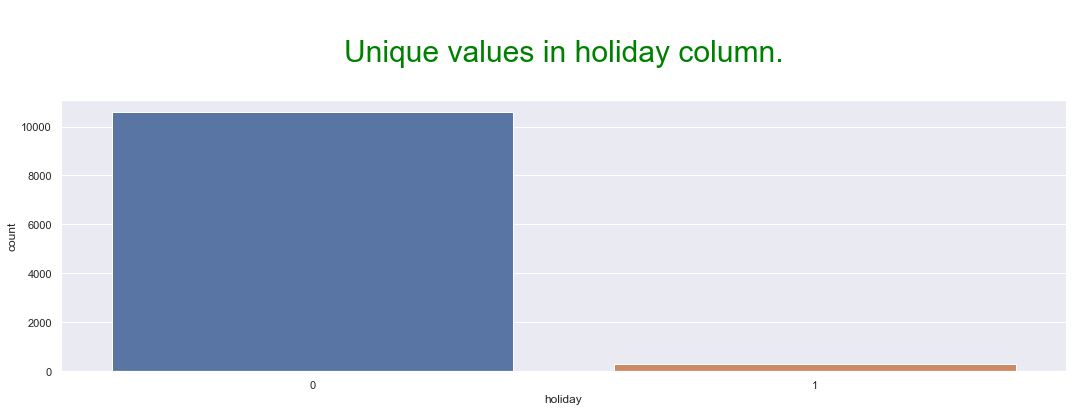

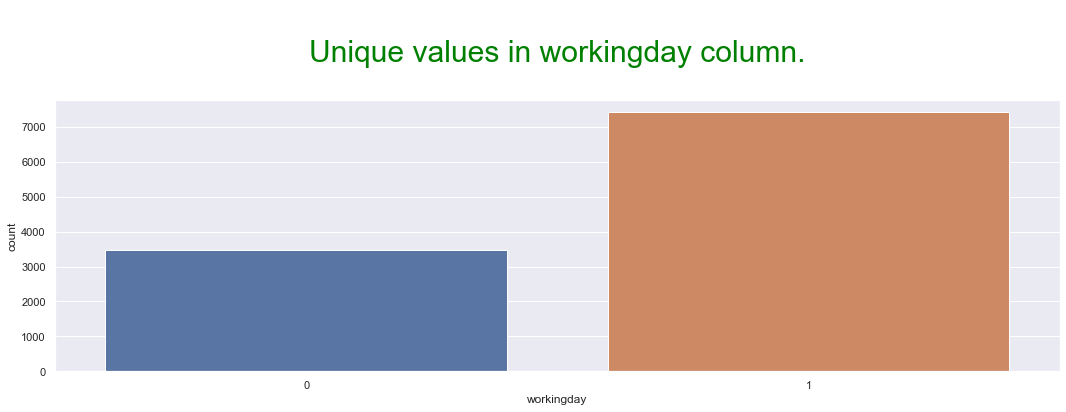

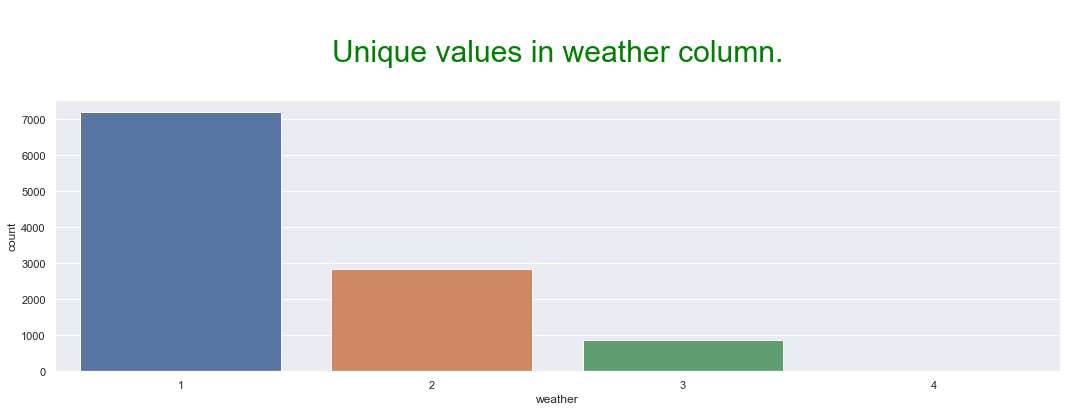

In [9]:
for column in df.columns[1:-7]:
    fig, axes = plt.subplots(figsize=(18,5))
    ax = sns.countplot(data=df, x=column)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90 if len(ax.get_xticklabels())>30 else 45 if len(ax.get_xticklabels())>15 else 0)
    plt.title(f"\nUnique values in {column} column.\n", fontsize=30, color="green")
    plt.show()

***
***
## **4. Univariate analysis - Continuous data.**

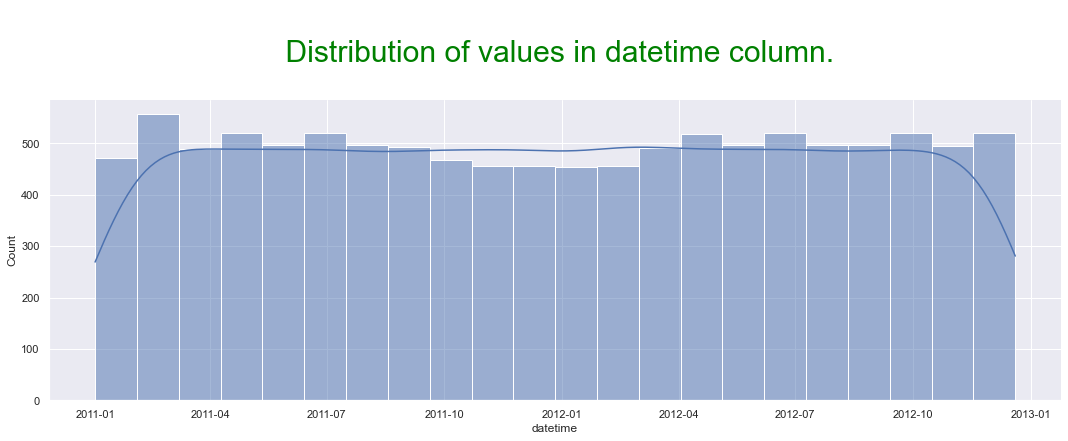

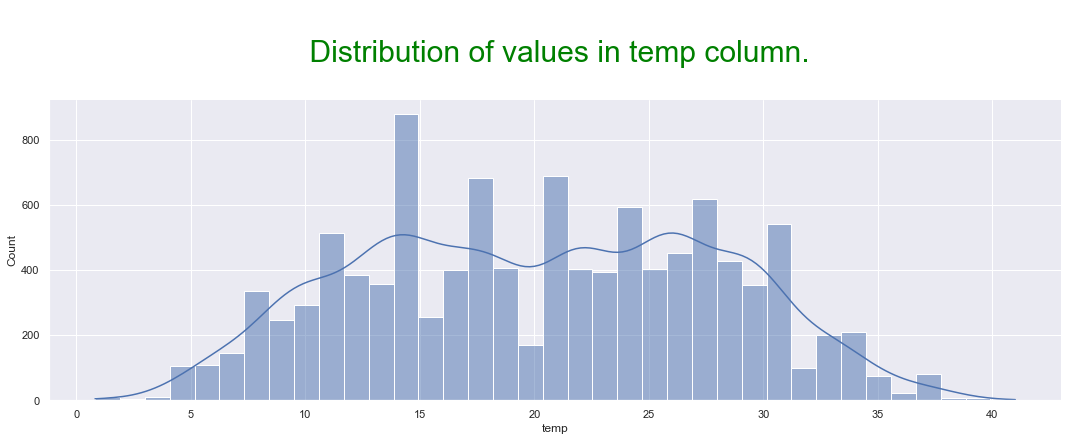

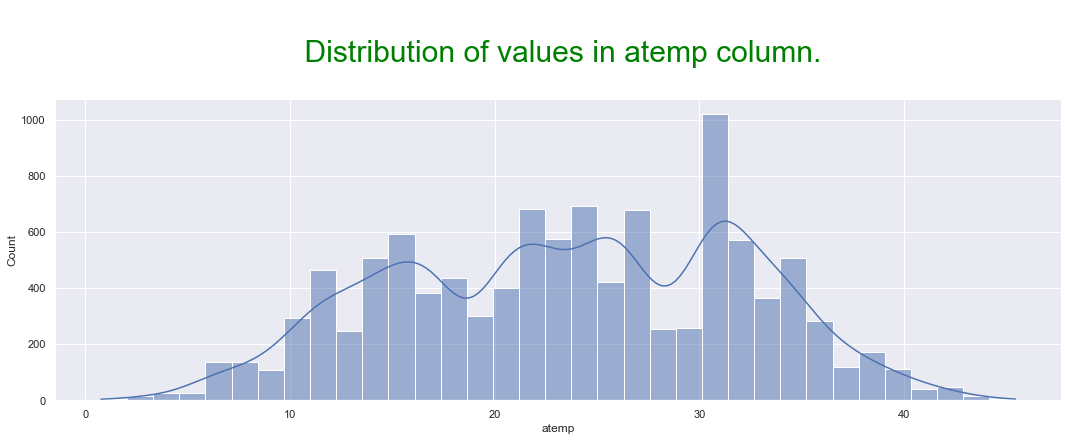

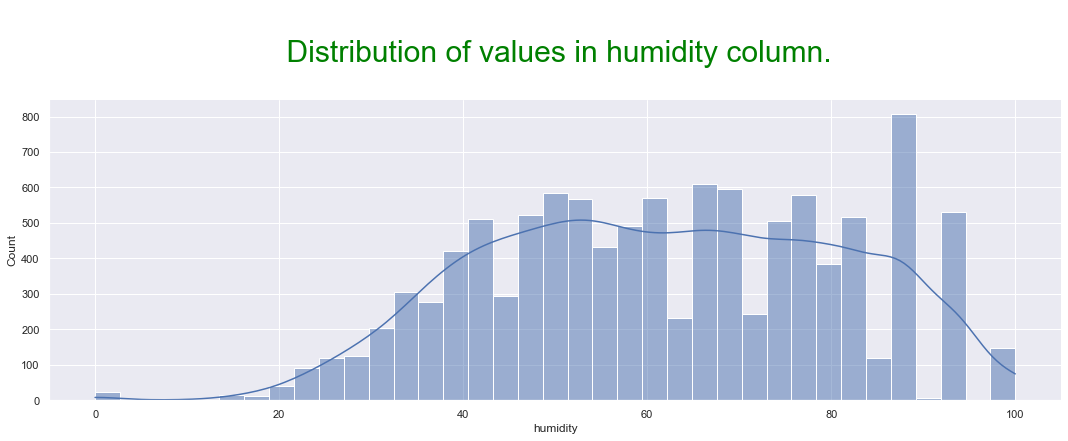

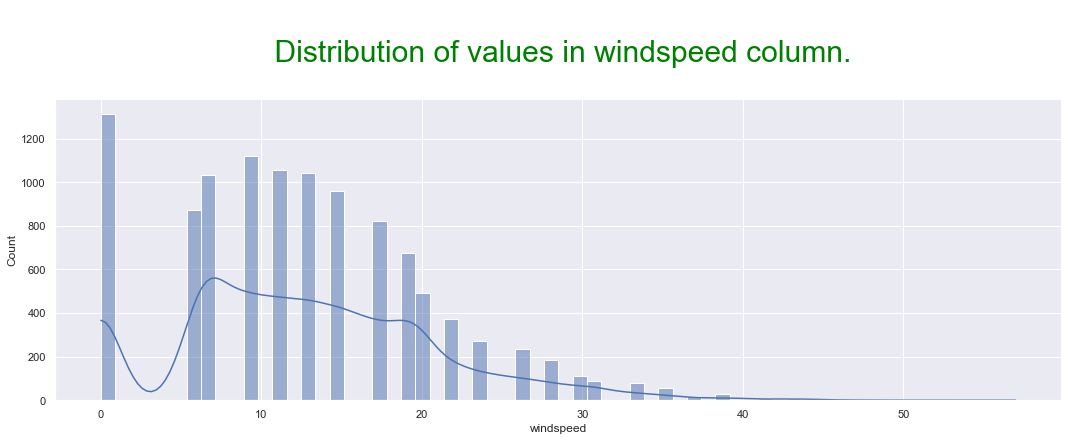

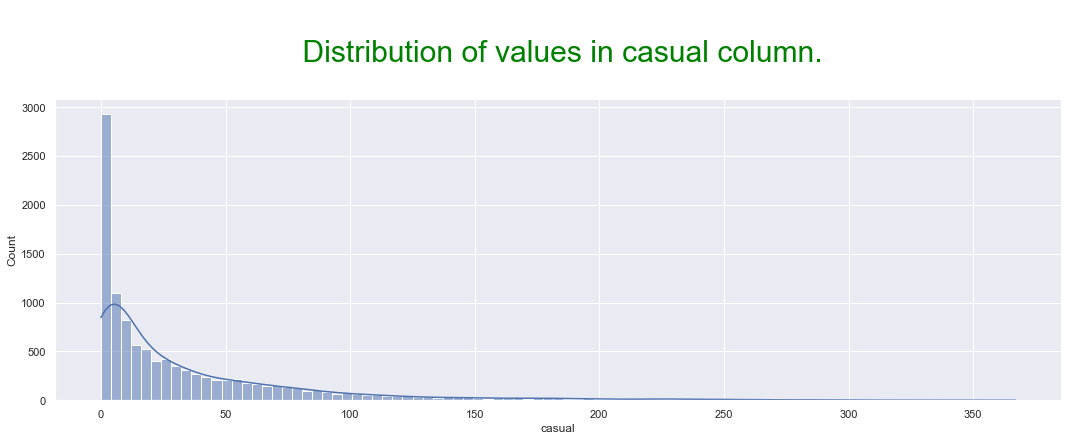

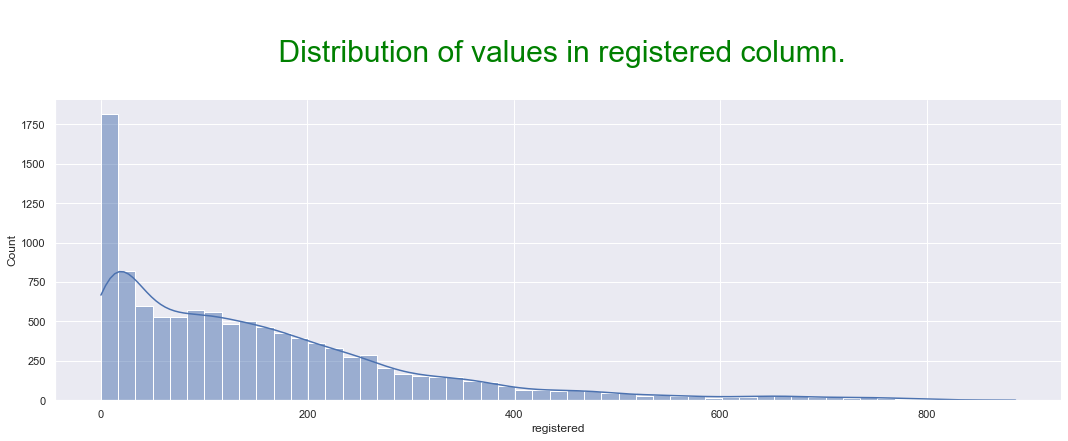

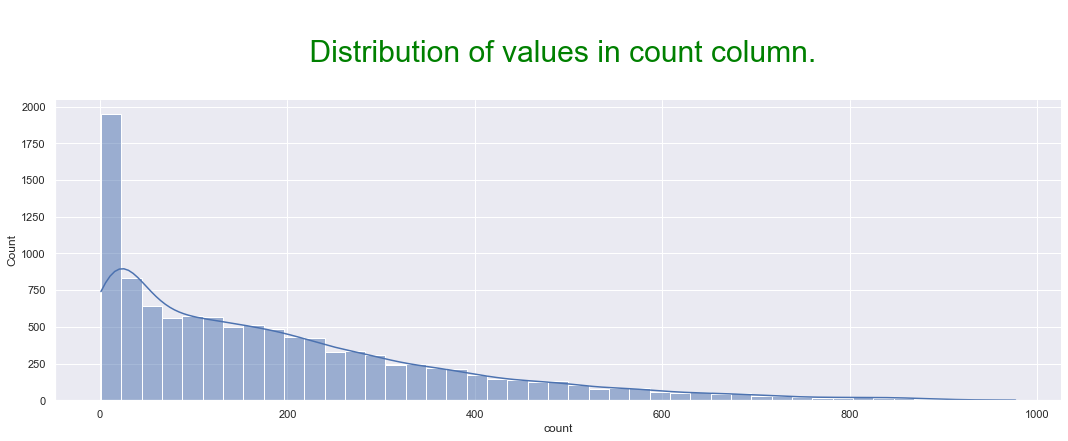

In [ ]:
for column in df.columns[[0, -7, -6, -5, -4, -3, -2, -1]]:
    sns.displot(df[column], kde=True, height=5, aspect=3)
    plt.title(f"\n Distribution of values in {column} column.\n", fontsize=30, color="green")
    plt.show()


***
***
## **4. Bivariate analysis - Range and Outliers.**

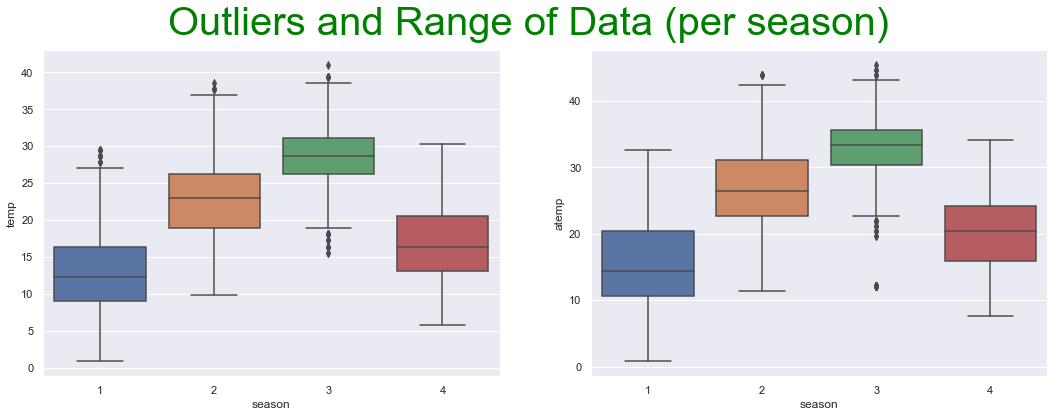

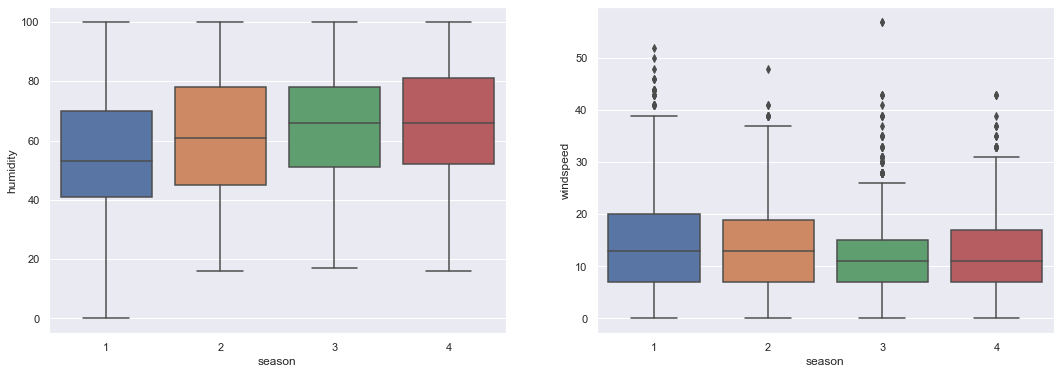

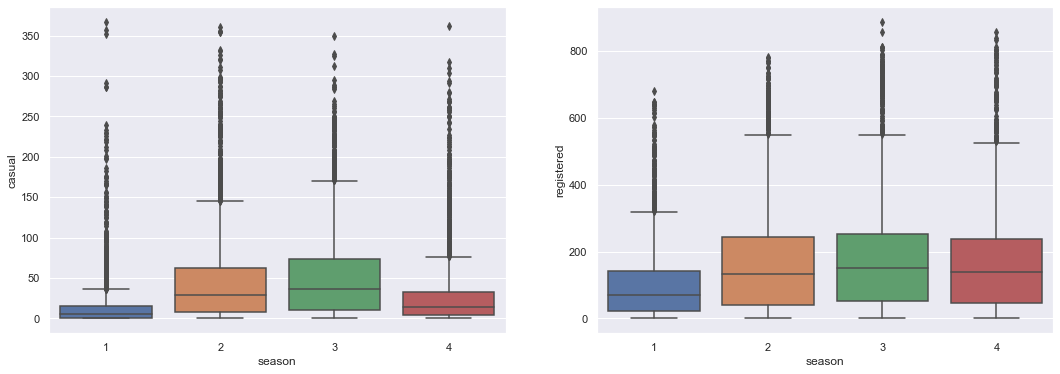

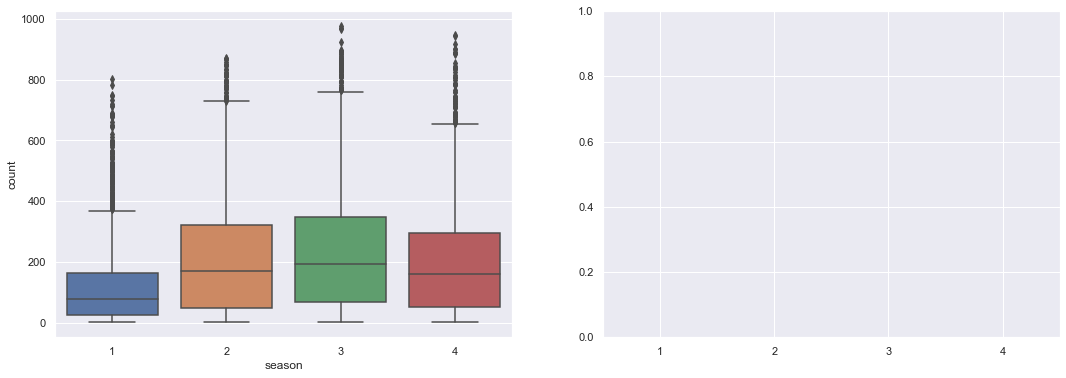

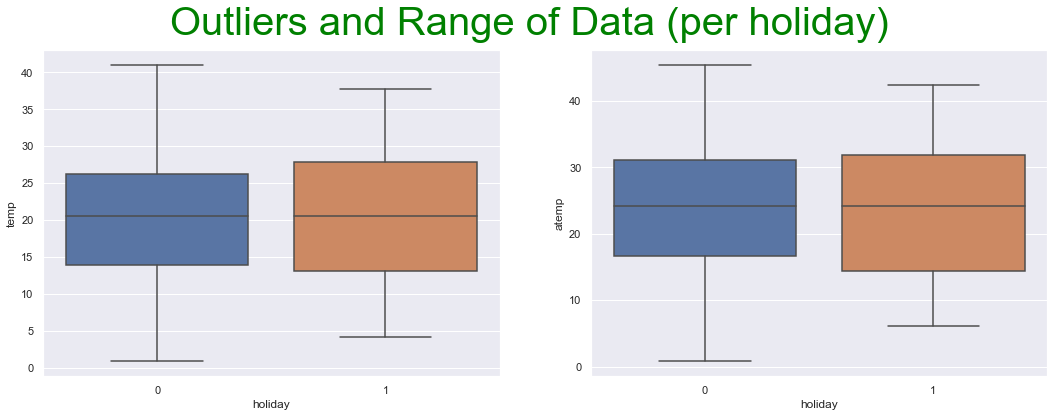

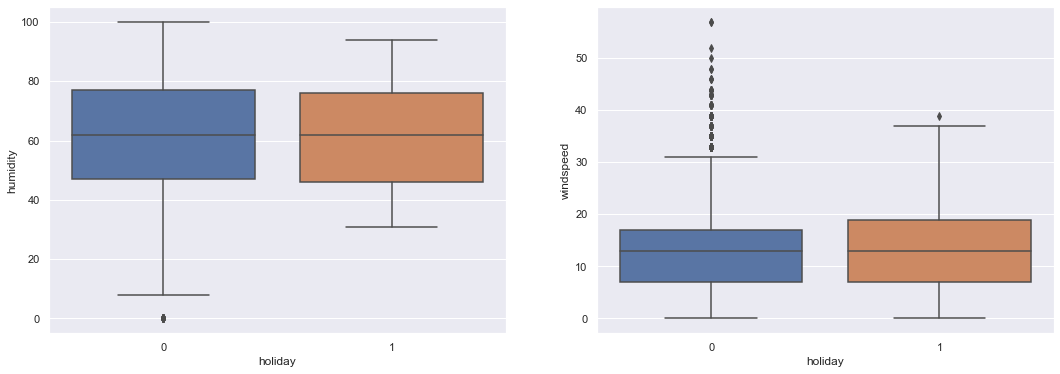

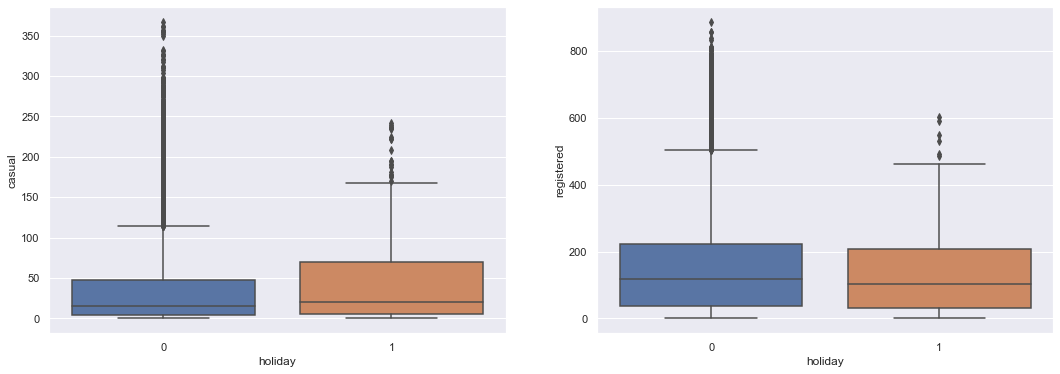

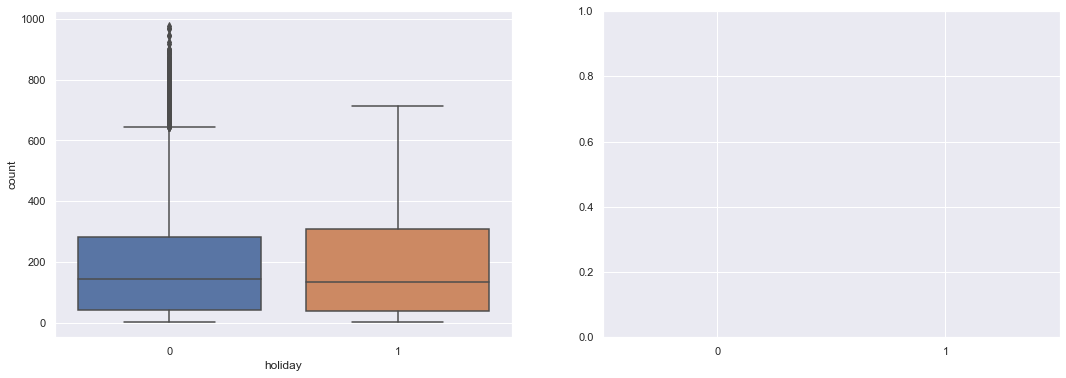

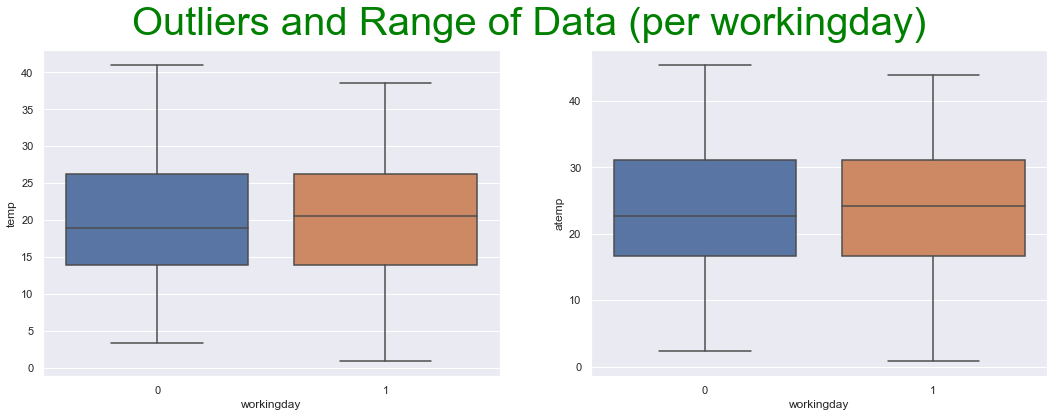

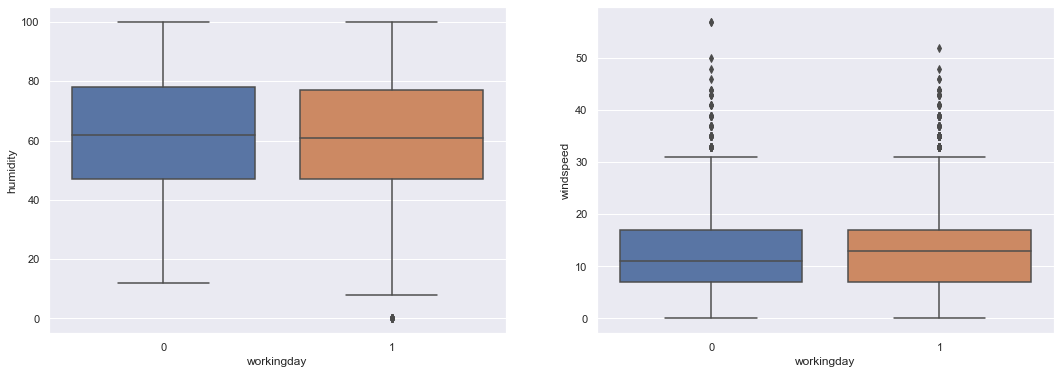

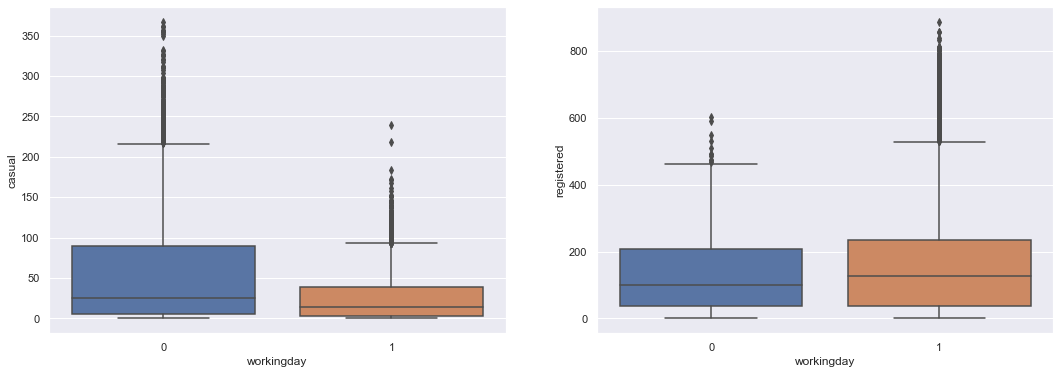

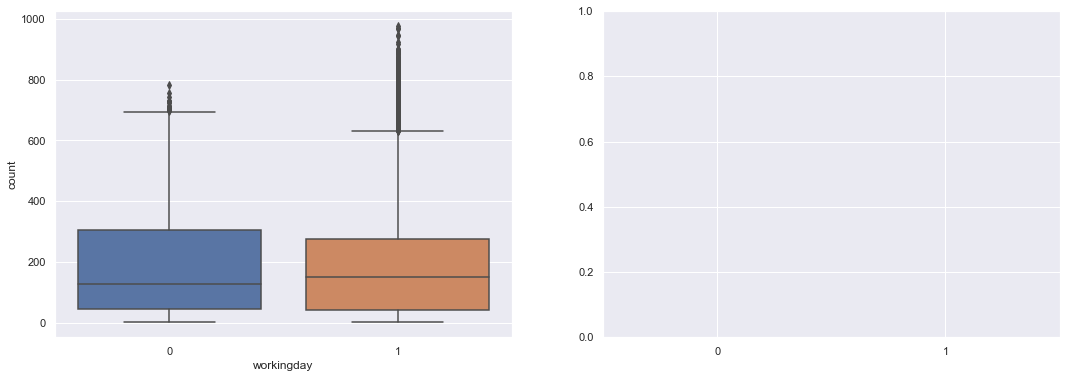

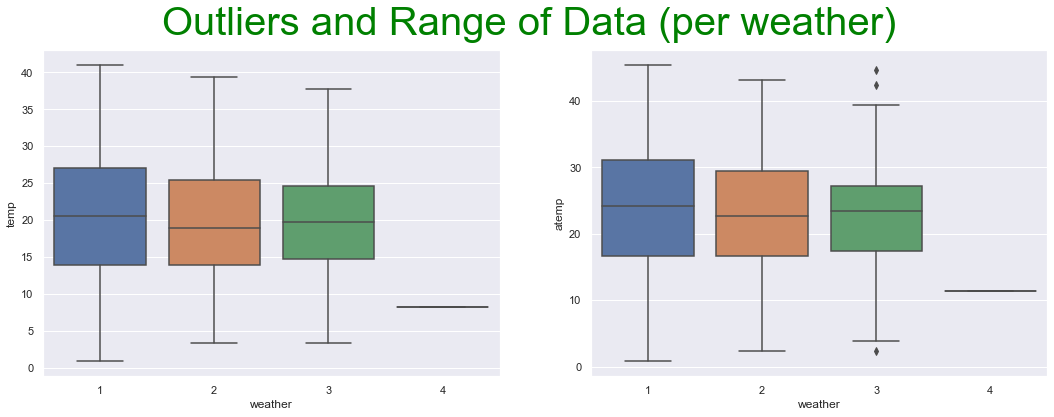

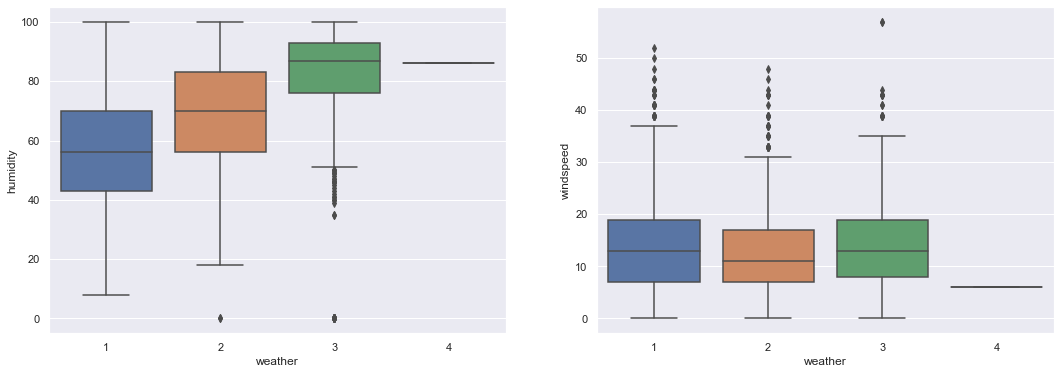

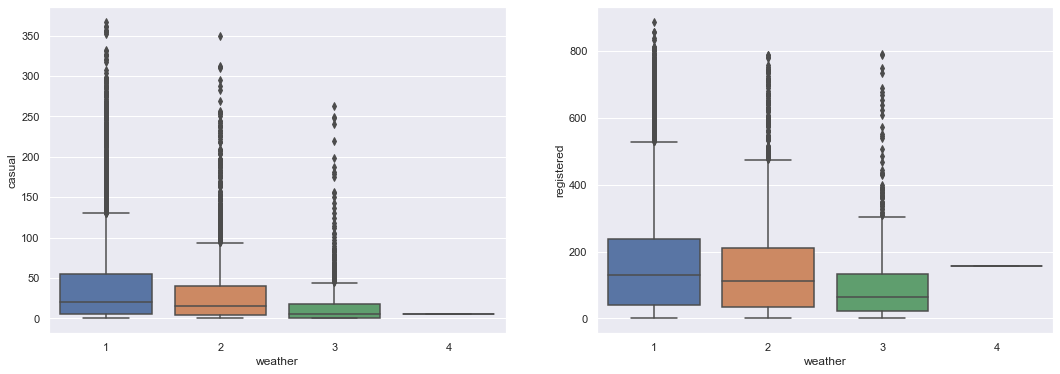

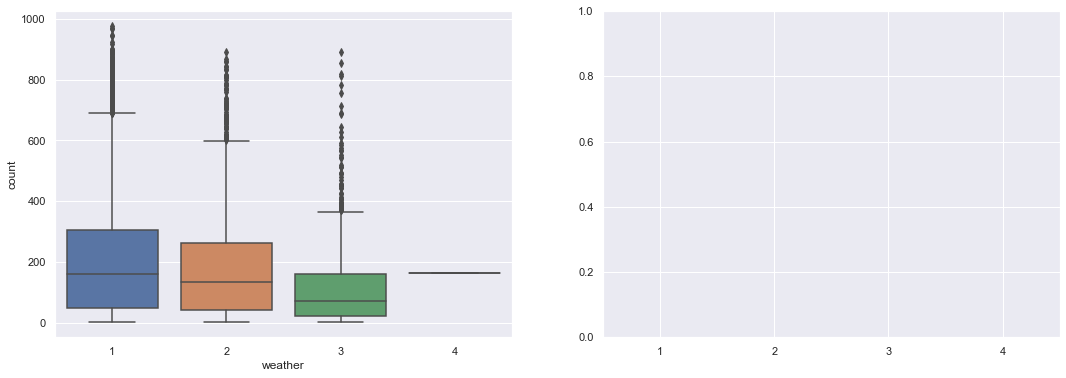

In [11]:
for category in ['season', 'holiday', 'workingday', 'weather']:
    for col, r, c in [['temp', 0, 0], ['atemp', 0, 1], ['humidity', 1, 0], ['windspeed', 1, 1], ['casual', 2, 0], ['registered', 2, 1], ['count', 3, 0]]:
        if c == 0:
            fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
        sns.boxplot(data=df, y=col, ax=axes[c], x=category)
        if c == 1:
            if r == 0:
                fig.suptitle(f"Outliers and Range of Data (per {category})", fontsize=40, color="green")
            plt.show()

***
***
## **5. Correlation between different columns.**

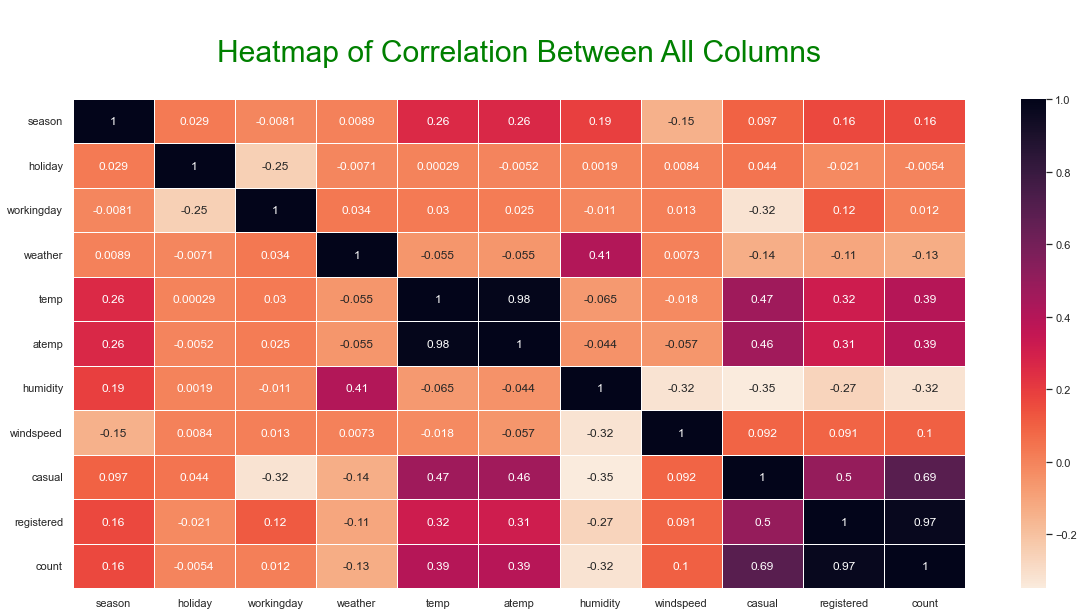

In [12]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

***
***
## **6. Two sample T test to analyze if working Day has effect on number of electric cycles rented.**

In [27]:
working = df[df.workingday == 1]['count'].reset_index(drop=True)
nonworking = df[df.workingday == 0]['count'].reset_index(drop=True)

### **H0: mean of cycles rented on working day = mean of cycles rented on non-working day**
### **H1: mean of cycles rented on working day != mean of cycles rented on non-working day**
***
***

### **Testing normality assumption.**
### Data is not normalized. 

In [34]:
print(stats.kstest(df['count'], 'norm'))
print(stats.kstest(working, 'norm'))
print(stats.kstest(nonworking, 'norm'))

KstestResult(statistic=0.9768790198445412, pvalue=0.0)
KstestResult(statistic=0.9728810787627574, pvalue=0.0)
KstestResult(statistic=0.9854088814732634, pvalue=0.0)


### **Testing assumption of equal variance.**
### The variance is equal.

In [36]:
stats.levene(working, nonworking)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

### **Result of 2 sample T test.**
### Failed to reject Null hypothesis with alpha 0.05.
### There is no significant difference between working and non-working days for number of cycles rented.

In [43]:
stats.ttest_ind(a=working, b=nonworking, equal_var=True)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

***
***
## **7. Anova test to analyze if the number of cycles rented is similar or different in different weathers.**

In [59]:
weather1 = df[df.weather == 1]['count'].reset_index(drop=True)
weather2 = df[df.weather == 2]['count'].reset_index(drop=True)
weather3 = df[df.weather == 3]['count'].reset_index(drop=True)
weather4 = df[df.weather == 4]['count'].reset_index(drop=True)

### **H0: mean of cycles rented is same in different weathers.**
### **H1: mean of cycles rented is not same in different weathers.**
***
***

### **Testing normality assumption.**
### Data is not normalized.

In [39]:
print(stats.kstest(weather1, 'norm'))
print(stats.kstest(weather2, 'norm'))
print(stats.kstest(weather3, 'norm'))
print(stats.kstest(weather4, 'norm'))

KstestResult(statistic=0.9784888116457893, pvalue=0.0)
KstestResult(statistic=0.9778314710579958, pvalue=0.0)
KstestResult(statistic=0.9609518470972225, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


### **Transforming data with log transformation.**
### Data is stil not normalized.

In [128]:
print(stats.kstest(np.log(weather1), 'norm'))
print(stats.kstest(np.log(weather2), 'norm'))
print(stats.kstest(np.log(weather3), 'norm'))
print(stats.kstest(np.log(weather4), 'norm'))

KstestResult(statistic=0.6823517812764641, pvalue=0.0)
KstestResult(statistic=0.6786946562675437, pvalue=0.0)
KstestResult(statistic=0.6307818160469413, pvalue=0.0)
KstestResult(statistic=0.9554303496363461, pvalue=0.0891393007273078)


### **Testing assumption of equal variance on original data.**
### The variance is not equal.

In [129]:
stats.levene(weather1, weather2, weather3, weather4)

LeveneResult(statistic=11.750057231641263, pvalue=1.1080873578554525e-07)

### **Testing assumption of equal variance on transformed data.**
### The variance is equal.

In [130]:
stats.levene(np.log(weather1), np.log(weather2), np.log(weather3), np.log(weather4))

LeveneResult(statistic=0.9262757877138246, pvalue=0.4270348183543722)

### **Result of Anova test.**
### Rejected Null hypothesis with alpha 0.05.
### There is a significant difference between weathers for number of cycles rented.

In [146]:
stats.f_oneway(np.log(weather1), np.log(weather2), np.log(weather3), np.log(weather4))

F_onewayResult(statistic=49.87947148398177, pvalue=5.214500121600914e-32)

### **Result of Kruskal test.**
### Rejected Null hypothesis with alpha 0.05.
### There is a significant difference between weathers for number of cycles rented.

In [132]:
stats.kruskal(np.log(weather1), np.log(weather2), np.log(weather3), np.log(weather4))

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

***
***
## **8. Anova test to analyze if the number of cycles rented is similar or different in different seasons.**

In [133]:
seasons1 = df[df.season == 1]['count'].reset_index(drop=True)
seasons2 = df[df.season == 2]['count'].reset_index(drop=True)
seasons3 = df[df.season == 3]['count'].reset_index(drop=True)
seasons4 = df[df.season == 4]['count'].reset_index(drop=True)

### **H0: mean of cycles rented is same in different seasons.**
### **H1: mean of cycles rented is same in different seasons.**
***
***

### **Testing normality assumption.**
### Data is not normalized.

In [134]:
print(stats.kstest(seasons1, 'norm'))
print(stats.kstest(seasons2, 'norm'))
print(stats.kstest(seasons3, 'norm'))
print(stats.kstest(seasons4, 'norm'))

KstestResult(statistic=0.9489550058031239, pvalue=0.0)
KstestResult(statistic=0.9836482724769685, pvalue=0.0)
KstestResult(statistic=0.9942593226050329, pvalue=0.0)
KstestResult(statistic=0.9873114040898037, pvalue=0.0)


### **Testing assumption of equal variance on data.**
### The variance is not equal.

In [161]:
stats.levene(seasons1, seasons2, seasons3, seasons4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

### **Result of Anova test.**
### Rejected Null hypothesis with alpha 0.05.
### There is a significant difference between seasons for number of cycles rented.

In [137]:
stats.f_oneway(np.log(seasons1), np.log(seasons2), np.log(seasons3), np.log(seasons4))

LeveneResult(statistic=9.640605587638781, pvalue=2.3678125658230693e-06)

### **Result of Kruskal test.**
### Rejected Null hypothesis with alpha 0.05.
### There is a significant difference between seasons for number of cycles rented.

In [162]:
stats.kruskal(np.log(seasons1), np.log(seasons2), np.log(seasons3), np.log(seasons4))

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

***
***
## **9. Chi square test to analyze if weather is dependent on season.**

### **H0: Weather is not dependent on season.**
### **H1: Weather is dependent on season.**
***
***

In [165]:
stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(df.weather, df.season))
stat, p

(49.15865559689363, 1.5499250736864862e-07)

***
***
## **10. Business Insights and Recommendations.**

#### **A.** Working Day has no effect not count of cycles rented.
#### **B.** Average of the number of rented cycles change per weather.
#### **C.** Average of the number of rented cycles change per seasons.
#### **D.** Weather and Seasons are dependent on each other.
#### **E.** There is a high correlation between temperature and feeling temperature.
#### **F.** Season 3 has higher temperatures.
#### **G.** Weather 3 has higher humidity levels